This notebook summarizes the impact of excluding wall material from the housing indicator on MPI 2005.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI'
outfd_path = code_path.parent.parent / 'output'

# khm dhs05

## individual-level

### read in MPI

#### one dataframe per cluster all in a list

##### harmonized with 10 and 14 (wall)

In [2]:
survey = 'khm_dhs05_cot'
spatial_res = 'clust'
n_spatial_unit = 557

In [3]:
df_lst = []
for i in range(1, n_spatial_unit+1):
    df = pd.read_stata(
        datafd_path / survey / f'{"_".join(survey.split("_")[:2])}_mpi_{spatial_res}{i}.dta'
    ) 
    df_lst.append(df)

##### harmonized with 10 and 14, wall material excluded (no wall)

In [4]:
survey = 'khm_dhs05_cot_nowall'
spatial_res = 'clust'
n_spatial_unit = 557

In [5]:
df_nowall_lst = []
for i in range(1, n_spatial_unit+1):
    df = pd.read_stata(
        datafd_path / survey / f'{"_".join(survey.split("_")[:2])}_mpi_{spatial_res}{i}.dta'
    ) 
    df_nowall_lst.append(df)

### explore and preprocess MPI

#### compile dataframes in the lists

##### wall

In [6]:
df = pd.concat(df_lst)

In [7]:
df.shape  # 35665 individuals

(35665, 109)

In [8]:
df.head(2)

,hh_id,ind_id,psu,strata,subsample,weight,area,region,region_01,agec4,...,g01_k_fuel_1,g01_k_asset_1,MPI_1_20,MPI_1_33,MPI_1_50,MPI_1,MPI_1_svy,MPI_1_SE,MPI_1_low95CI,MPI_1_upp95CI
0,10001,1000101,1,245,selected,0.414342,urban,Pursat,Pursat,60+,...,0.0,0.0,0.316162,0.260606,0.163636,0.260606,0.260606,0.088829,0.062683,0.458529
1,10001,1000102,1,245,selected,0.414342,urban,Pursat,Pursat,18-59,...,0.0,0.0,0.316162,0.260606,0.163636,0.260606,0.260606,0.088829,0.062683,0.458529


In [9]:
df.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4',
       ...
       'g01_k_fuel_1', 'g01_k_asset_1', 'MPI_1_20', 'MPI_1_33', 'MPI_1_50',
       'MPI_1', 'MPI_1_svy', 'MPI_1_SE', 'MPI_1_low95CI', 'MPI_1_upp95CI'],
      dtype='object', length=109)

##### no wall

In [10]:
df_nowall = pd.concat(df_nowall_lst)

In [11]:
df_nowall.shape  # 35665 individuals

(35665, 109)

In [12]:
df_nowall.head(2)

,hh_id,ind_id,psu,strata,subsample,weight,area,region,region_01,agec4,...,g01_k_fuel_1,g01_k_asset_1,MPI_1_20,MPI_1_33,MPI_1_50,MPI_1,MPI_1_svy,MPI_1_SE,MPI_1_low95CI,MPI_1_upp95CI
0,10001,1000101,1,245,selected,0.414342,urban,Pursat,Pursat,60+,...,0.0,0.0,0.316162,0.260606,0.163636,0.260606,0.260606,0.088829,0.062683,0.458529
1,10001,1000102,1,245,selected,0.414342,urban,Pursat,Pursat,18-59,...,0.0,0.0,0.316162,0.260606,0.163636,0.260606,0.260606,0.088829,0.062683,0.458529


In [13]:
df_nowall.columns

Index(['hh_id', 'ind_id', 'psu', 'strata', 'subsample', 'weight', 'area',
       'region', 'region_01', 'agec4',
       ...
       'g01_k_fuel_1', 'g01_k_asset_1', 'MPI_1_20', 'MPI_1_33', 'MPI_1_50',
       'MPI_1', 'MPI_1_svy', 'MPI_1_SE', 'MPI_1_low95CI', 'MPI_1_upp95CI'],
      dtype='object', length=109)

#### filter columns of interest

In [14]:
columns_of_interest = [
    'ind_id', 'area', 'c_vector_1', 'c_censured_vector_1_33'
]

In [15]:
df = df[columns_of_interest]
df_nowall = df_nowall[columns_of_interest]

#### combine wall + no wall

In [16]:
assert all(df.ind_id == df_nowall.ind_id)

In [17]:
df_merged = df.merge(
    df_nowall,
    on=['ind_id', 'area'],
    suffixes=('_wall', '_nowall'),
    validate='1:1'
)

In [18]:
df_merged.shape  # 35665 individuals

(35665, 6)

In [19]:
df_merged.head(2)

,ind_id,area,c_vector_1_wall,c_censured_vector_1_33_wall,c_vector_1_nowall,c_censured_vector_1_33_nowall
0,1000101,urban,0.166667,0.0,0.166667,0.0
1,1000102,urban,0.166667,0.0,0.166667,0.0


#### summarize missingness and drop people with missing MPI

In [20]:
df_merged.isna().sum()

ind_id                             0
area                               0
c_vector_1_wall                  924
c_censured_vector_1_33_wall      924
c_vector_1_nowall                924
c_censured_vector_1_33_nowall    924
dtype: int64

In [21]:
df_valid = df_merged.dropna(how='any')

In [22]:
df_valid.shape

(34741, 6)

In [23]:
assert 34741 + 924 == 35665

### compare wall vs no-wall

#### more preprocessing prep

In [24]:
# Calculate decrease in poverty scores (weighted deprivation counts) due to dropping of wall
loss_c = df_valid.c_vector_1_wall - df_valid.c_vector_1_nowall
# Scores/Counts not changed: True/False
df_valid['c_not_impacted'] = loss_c == 0
# Scores/Counts decreased by 1/18: True/False
df_valid['c_dropped_1_18th'] = np.isclose(loss_c, 1/18, atol=1e-5)

C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\841704370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['c_not_impacted'] = loss_c == 0
C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\841704370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['c_dropped_1_18th'] = np.isclose(loss_c, 1/18, atol=1e-5)


In [25]:
# Swap poverty scores in the cell above to censored poverty scores
loss_c_censured = df_valid.c_censured_vector_1_33_wall - df_valid.c_censured_vector_1_33_nowall
df_valid['c_censured_not_impacted'] = loss_c_censured == 0
df_valid['c_censured_dropped_1_18th'] = np.isclose(loss_c_censured, 1/18, atol=1e-5)
df_valid['c_censured_dropped_1_3rd'] = np.isclose(loss_c_censured, 1/3, atol=1e-5)

C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\1840738208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['c_censured_not_impacted'] = loss_c_censured == 0
C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\1840738208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['c_censured_dropped_1_18th'] = np.isclose(loss_c_censured, 1/18, atol=1e-5)
C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\1840738208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [26]:
# Fix numerical instability issues
df_valid.c_vector_1_wall = df_valid.c_vector_1_wall.round(4)
df_valid.c_vector_1_nowall = df_valid.c_vector_1_nowall.round(4)
df_valid.c_censured_vector_1_33_wall = df_valid.c_censured_vector_1_33_wall.round(4)
df_valid.c_censured_vector_1_33_nowall = df_valid.c_censured_vector_1_33_nowall.round(4)

C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\744442674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid.c_vector_1_wall = df_valid.c_vector_1_wall.round(4)
C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\744442674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid.c_vector_1_nowall = df_valid.c_vector_1_nowall.round(4)
C:\Users\tianc\AppData\Local\Temp\ipykernel_24120\744442674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [27]:
df_valid.area.value_counts()

rural    27050
urban     7691
Name: area, dtype: int64

In [28]:
rural_df = df_valid[df_valid.area == 'rural']
urban_df = df_valid[df_valid.area == 'urban']

#### define plotting function

In [29]:
def plot(area, area_df, std_score_col, score_change_cols_dict, ylim=None):
    # Group by standard score, and count each type of score change 
    # e.g. 'c_not_impacted', 'c_dropped_1_18th', etc.
    grouped_data = area_df.groupby(std_score_col)[
        list(score_change_cols_dict.values())
    ].sum()
    grouped_data.index = np.round(grouped_data.index, 4)
    grouped_data = grouped_data.reindex(np.arange(0, 1.0001, 1/18).round(4)).reset_index()

    # Set up the matplotlib figure and axes
    fig, ax = plt.subplots(figsize=(12, 7))

    # Number of groups (unique standard scores)
    n_groups = len(grouped_data)
    index = np.arange(n_groups)
    
    # Plotting
    bottom = np.repeat(0, n_groups)
    for label, col in score_change_cols_dict.items():
        bar_heights = grouped_data[col]
        if label == 'Not impacted':
            ax.bar(index, bar_heights, bottom=bottom, label=label, color='grey')
        elif label == 'Decreased by 1/18':
            ax.bar(index, bar_heights, bottom=bottom, label=label, color='C0')
        elif label == 'Decreased by 1/3':
            ax.bar(index, bar_heights, bottom=bottom, label=label, color='C1')
        else:
            ax.bar(index, bar_heights, bottom=bottom, label=label)
        bottom = bottom + bar_heights

    if ylim:
        ax.set_ylim(0, ylim)
    ax.set_xlabel('Standard poverty score including wall material', fontsize=13)
    ax.set_ylabel('Number of people', fontsize=13)
    ax.set_title(
        'Count of individual poverty scores decreased vs not impacted by exclusion of wall material from housing indicator'
        '\nby their standard poverty scores (that include wall material)'
        f'\n{area} area',
        fontsize=14
    )
    ax.set_xticks(index)
    ax.set_xticklabels([f'{i}/18' if i not in [0, 18] else int(i/18) for i in index], fontsize=11) 
    # grouped_data[std_score_col].round(3), fontsize=11)
    ax.tick_params(axis='y', labelsize=12)

    ax.legend(
        fontsize=12,
        title='Impact on poverty score from exclusion of wall material', title_fontsize=13
    )

    plt.tight_layout()
    plt.show()

#### compare poverty score (weighted deprivation count)

In [30]:
loss_c.unique()  # Any decrease is by 1/18 as only the housing indicator is impacted

array([0.        , 0.05555556, 0.05555557, 0.05555558, 0.05555555,
       0.05555556, 0.05555552], dtype=float32)

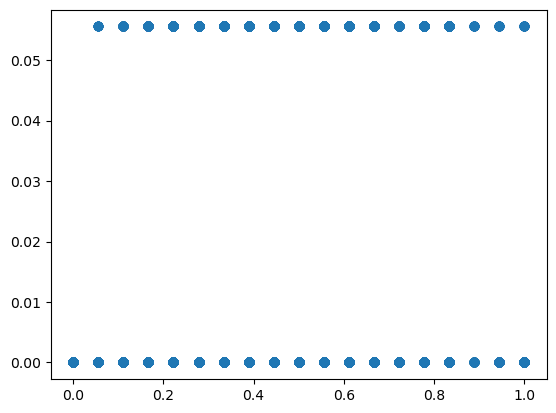

In [31]:
plt.scatter(df_valid.c_vector_1_wall, loss_c)  # not quite helpful

In [32]:
pct_impacted_by_area = df_valid.groupby('area')[['c_not_impacted', 'c_dropped_1_18th']].mean() * 100

In [33]:
pct_impacted_by_area

,c_not_impacted,c_dropped_1_18th
area,,
rural,81.079482,18.920518
urban,88.779092,11.220908


In [34]:
pct_impacted_by_area.sum(axis=1)  # Sanity check

area
rural    100.0
urban    100.0
dtype: float64

In [35]:
ppl_impacted_by_area = df_valid.groupby('area')[['c_not_impacted', 'c_dropped_1_18th']].sum()

In [36]:
ppl_impacted_by_area

,c_not_impacted,c_dropped_1_18th
area,,
rural,21932,5118
urban,6828,863


##### dissect impact of dropping wall on rural people by their standard scores: bar chart

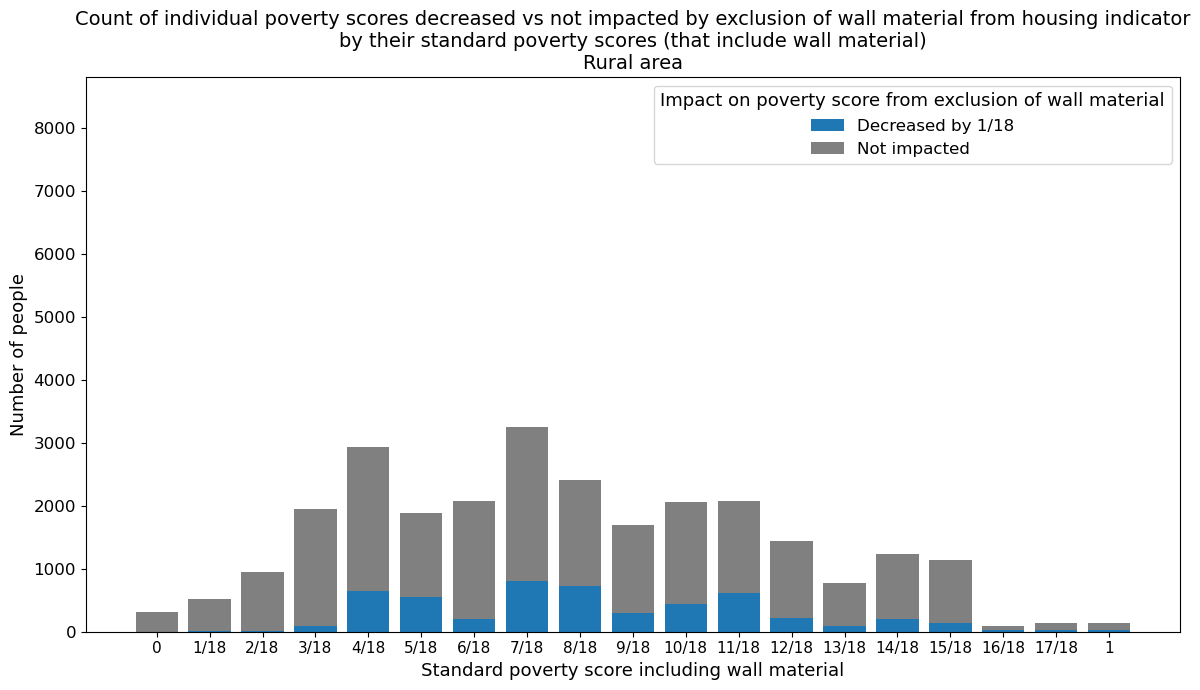

In [38]:
plot(
    'Rural', rural_df, 'c_vector_1_wall',  # x axis
    {'Decreased by 1/18': 'c_dropped_1_18th', 'Not impacted': 'c_not_impacted'},
    ylim=8800
)

zoom in

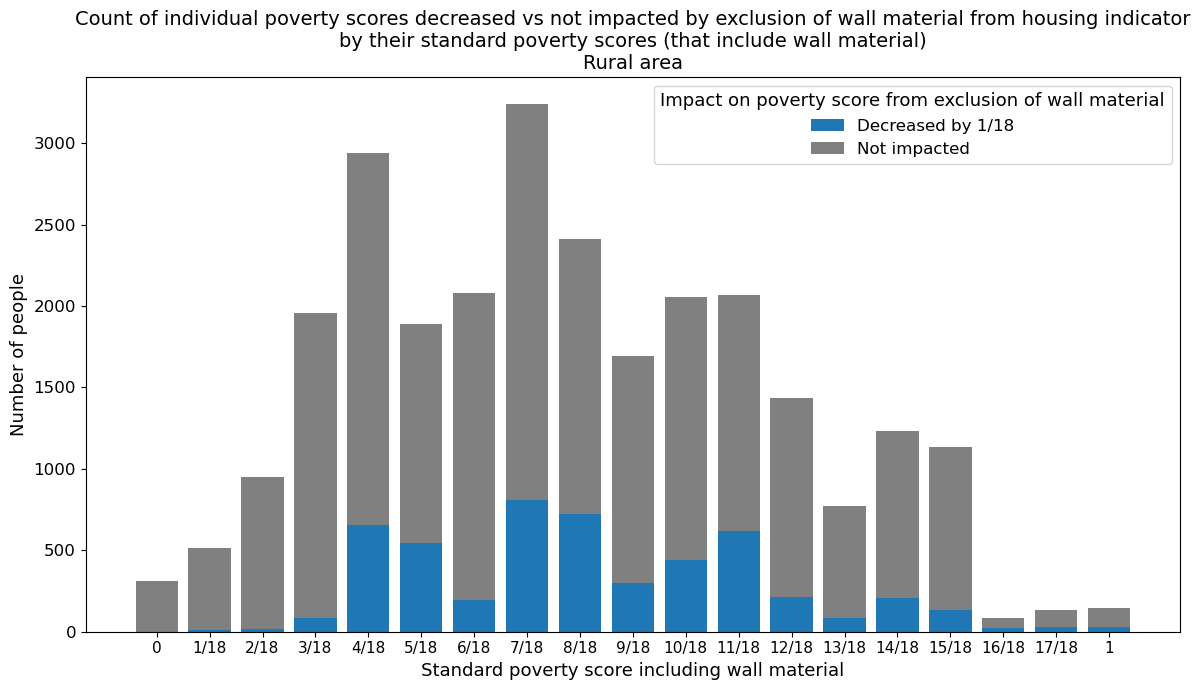

In [39]:
plot(
    'Rural', rural_df, 'c_vector_1_wall',  # x axis
    {'Decreased by 1/18': 'c_dropped_1_18th', 'Not impacted': 'c_not_impacted'}
)

##### dissect impact of dropping wall on urban people by their standard scores: bar chart

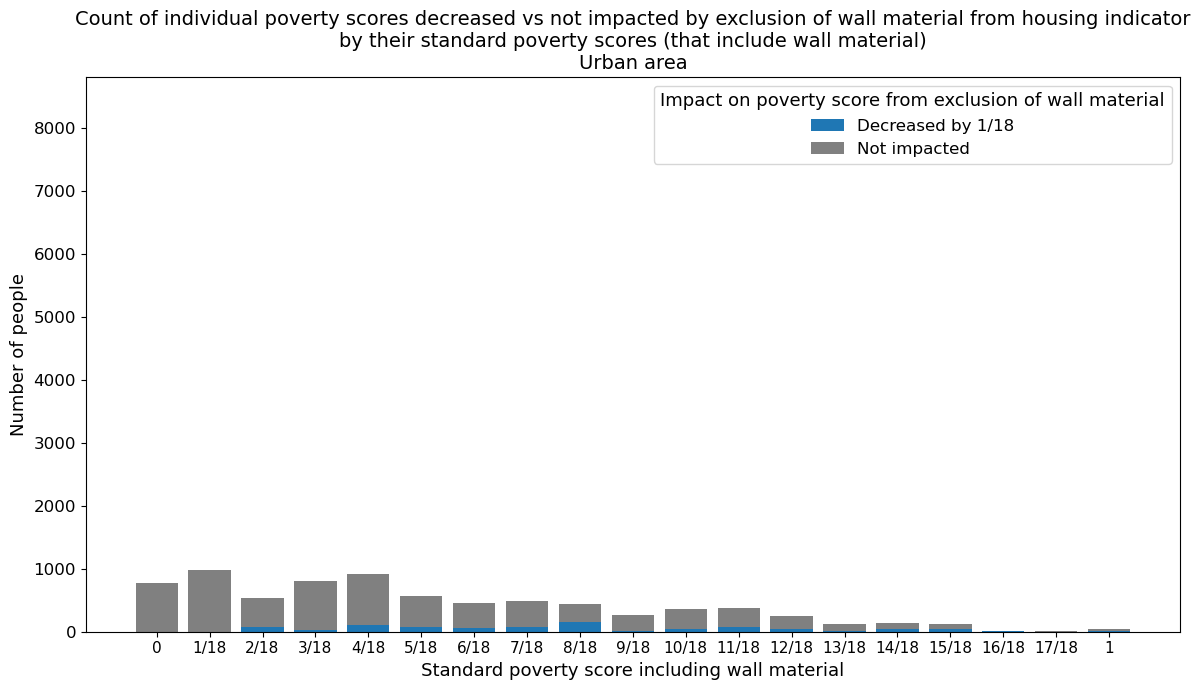

In [40]:
plot(
    'Urban', urban_df, 'c_vector_1_wall',  # x axis
    {'Decreased by 1/18': 'c_dropped_1_18th', 'Not impacted': 'c_not_impacted'},
    ylim=8800
)

zoom in

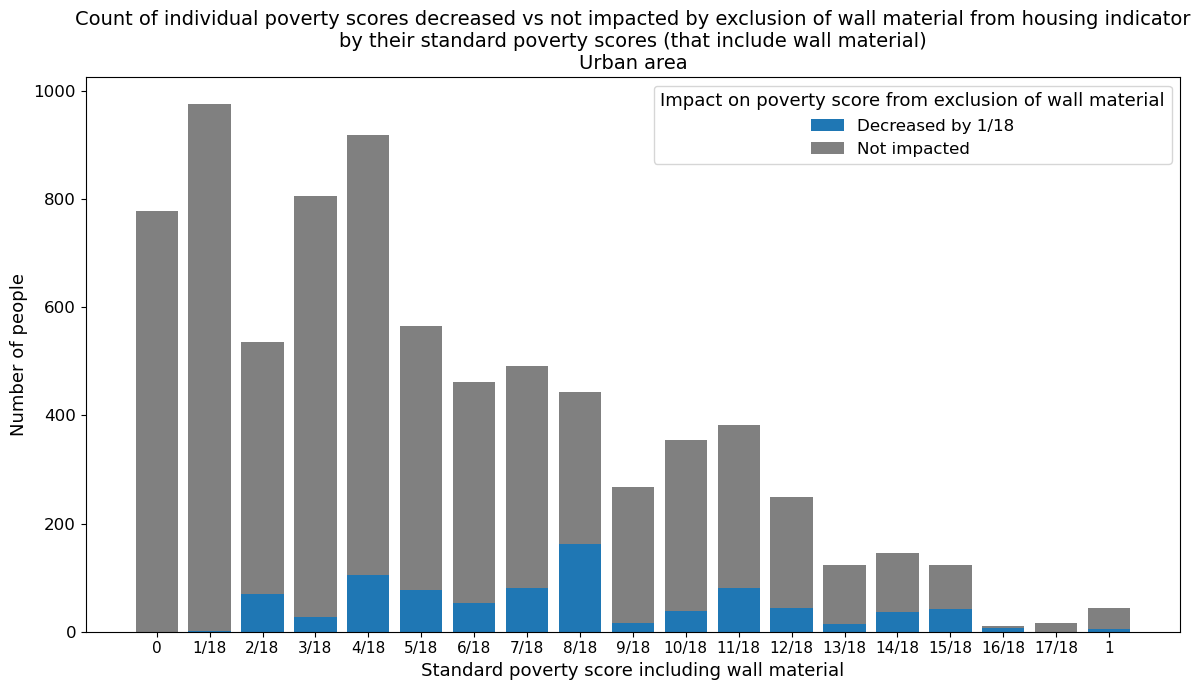

In [41]:
plot(
    'Urban', urban_df, 'c_vector_1_wall',  # x axis
    {'Decreased by 1/18': 'c_dropped_1_18th', 'Not impacted': 'c_not_impacted'}
)

#### compare censured poverty score

In [42]:
loss_c_censured.unique()

array([0.        , 0.05555558, 0.05555555, 0.33333334, 0.05555552],
      dtype=float32)

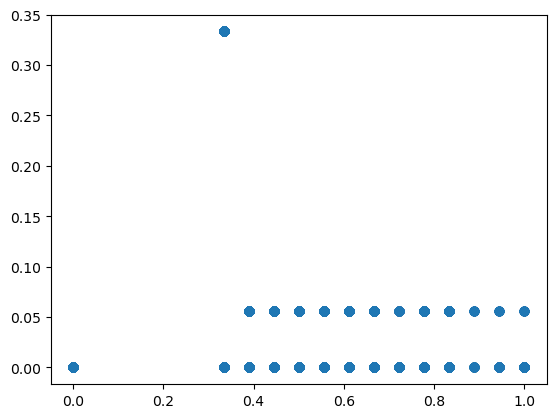

In [43]:
plt.scatter(df_valid.c_censured_vector_1_33_wall, loss_c_censured)  # not quite helpful

In [44]:
pct_impacted_by_area = df_valid.groupby('area')[
    ['c_censured_not_impacted', 'c_censured_dropped_1_18th', 'c_censured_dropped_1_3rd']
].mean() * 100

In [45]:
pct_impacted_by_area

,c_censured_not_impacted,c_censured_dropped_1_18th,c_censured_dropped_1_3rd
area,,,
rural,85.937153,13.334566,0.728281
urban,92.419711,6.878169,0.702119


In [46]:
pct_impacted_by_area.sum(axis=1)  # Sanity check

area
rural    100.0
urban    100.0
dtype: float64

In [47]:
ppl_impacted_by_area = df_valid.groupby('area')[
    ['c_censured_not_impacted', 'c_censured_dropped_1_18th', 'c_censured_dropped_1_3rd']
].sum()

In [48]:
ppl_impacted_by_area

,c_censured_not_impacted,c_censured_dropped_1_18th,c_censured_dropped_1_3rd
area,,,
rural,23246,3607,197
urban,7108,529,54


##### dissect impact of dropping wall on rural people by their standard scores: bar chart

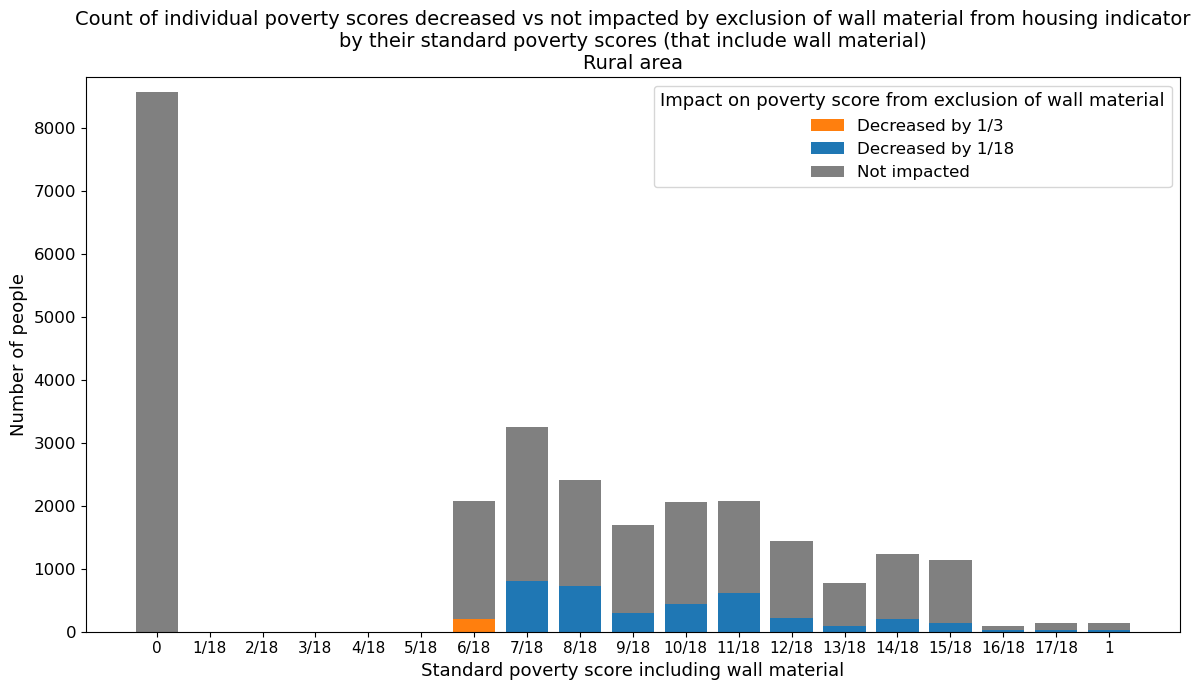

In [49]:
plot(
    'Rural', rural_df, 'c_censured_vector_1_33_wall',  # x axis
    {
        'Decreased by 1/3': 'c_censured_dropped_1_3rd',
        'Decreased by 1/18': 'c_censured_dropped_1_18th', 
        'Not impacted': 'c_censured_not_impacted'
    },
    ylim=8800
)

zoom in

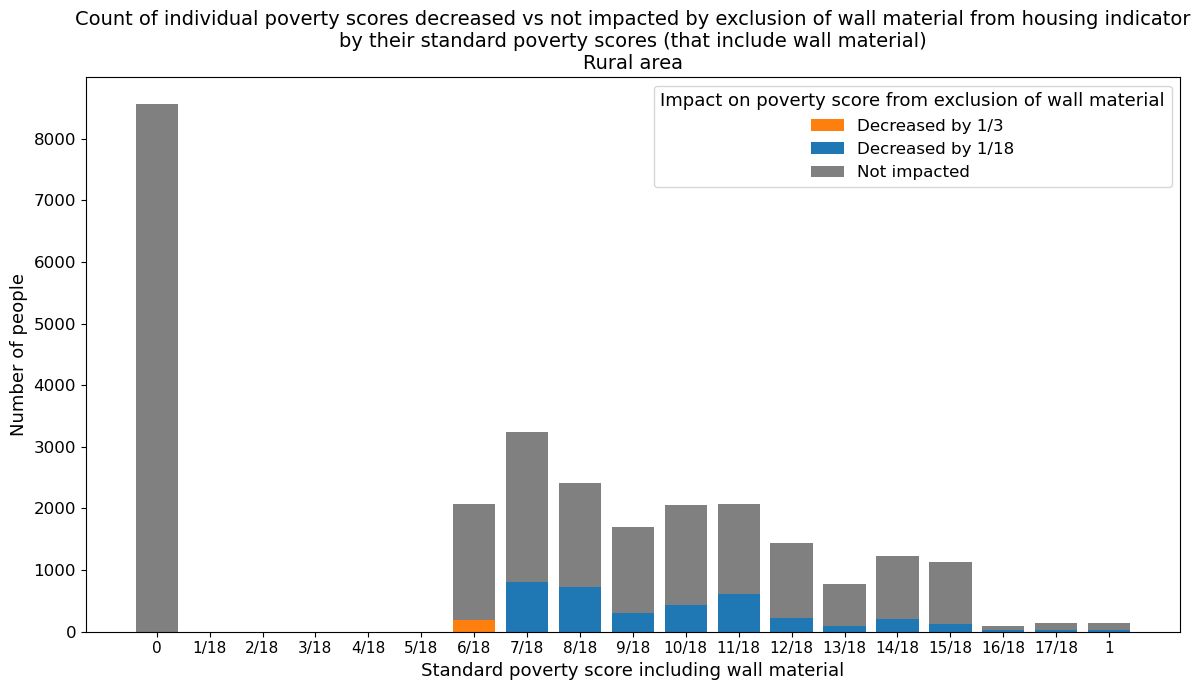

In [50]:
plot(
    'Rural', rural_df, 'c_censured_vector_1_33_wall',  # x axis
    {
        'Decreased by 1/3': 'c_censured_dropped_1_3rd',
        'Decreased by 1/18': 'c_censured_dropped_1_18th', 
        'Not impacted': 'c_censured_not_impacted'
    }
)

##### dissect impact of dropping wall on urban people by their standard scores: bar chart

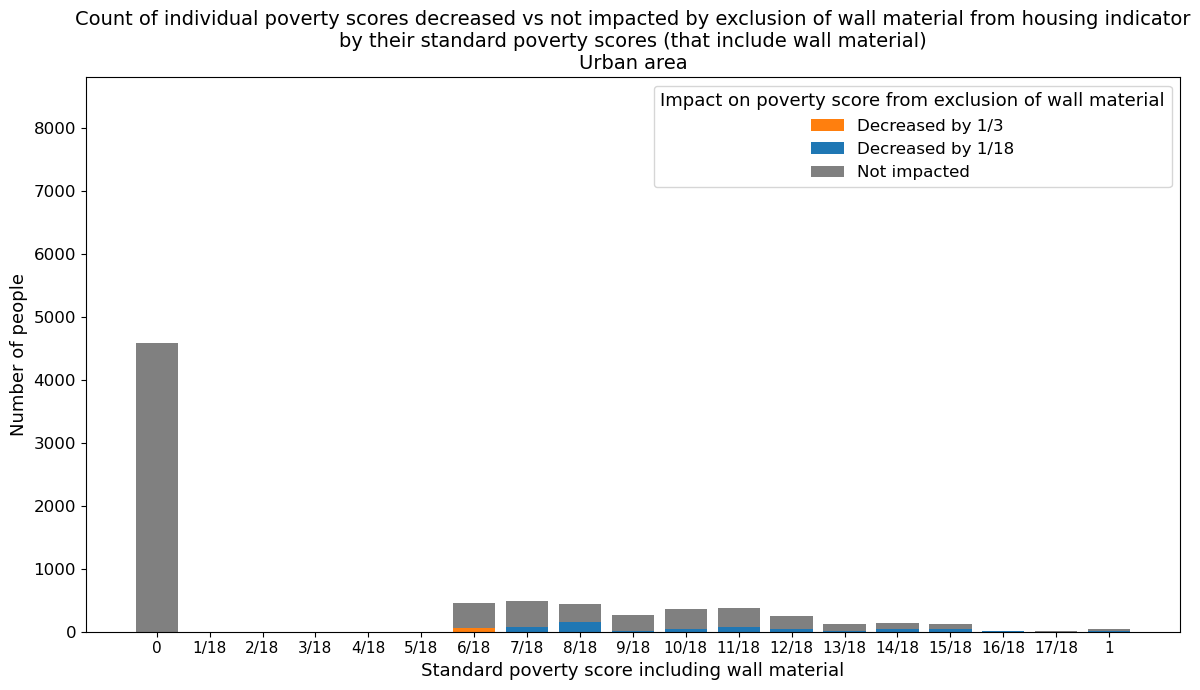

In [51]:
plot(
    'Urban', urban_df, 'c_censured_vector_1_33_wall',  # x axis
    {
        'Decreased by 1/3': 'c_censured_dropped_1_3rd',
        'Decreased by 1/18': 'c_censured_dropped_1_18th', 
        'Not impacted': 'c_censured_not_impacted'
    },
    ylim=8800
)

zoom in

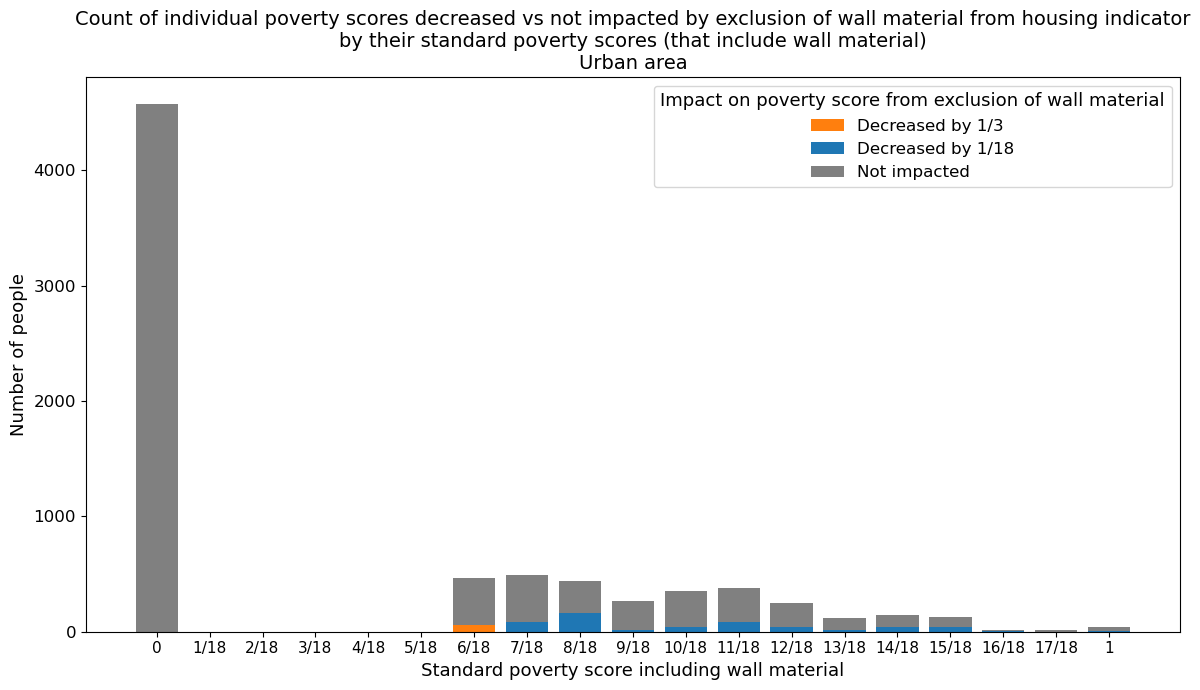

In [52]:
plot(
    'Urban', urban_df, 'c_censured_vector_1_33_wall',  # x axis
    {
        'Decreased by 1/3': 'c_censured_dropped_1_3rd',
        'Decreased by 1/18': 'c_censured_dropped_1_18th', 
        'Not impacted': 'c_censured_not_impacted'
    }
)

## cluster-level

#### read in MPI 

##### harmonized with 10 and 14

In [2]:
survey = 'khm_dhs05_cot'
spatial_res = 'clust'
df = pd.read_csv(outfd_path / 'data' / f'mpi_{survey}_{spatial_res}_CI_mis.csv')

##### harmonized with 10 and 14, wall material excluded 

In [3]:
survey = 'khm_dhs05_cot_nowall'
spatial_res = 'clust'
df_nowall = pd.read_csv(outfd_path / 'data' / f'mpi_{survey}_{spatial_res}_CI_mis.csv')

#### compare wall vs no-wall

##### same except for MPI

In [4]:
df.columns

Index(['clust_no', 'mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI', 'tot_samp_ppl',
       'pct_samp_ppl_mis'],
      dtype='object')

In [5]:
df_nowall.columns

Index(['clust_no', 'mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI', 'tot_samp_ppl',
       'pct_samp_ppl_mis'],
      dtype='object')

In [6]:
df_bulk = df.drop(columns=['mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI'])
df_nowall_bulk = df_nowall.drop(columns=['mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI'])

In [7]:
pd.testing.assert_frame_equal(df_bulk, df_nowall_bulk)

##### difference in MPI

<AxesSubplot:>

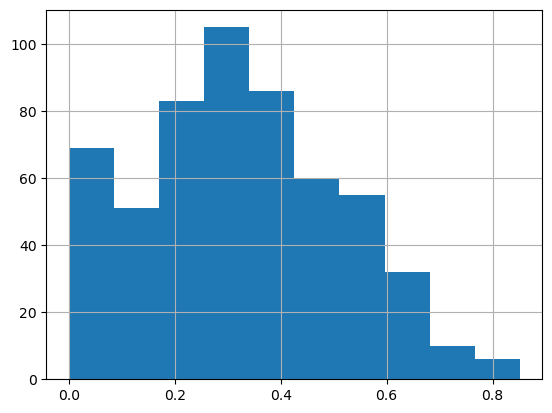

In [8]:
df.mpi.hist()

<AxesSubplot:>

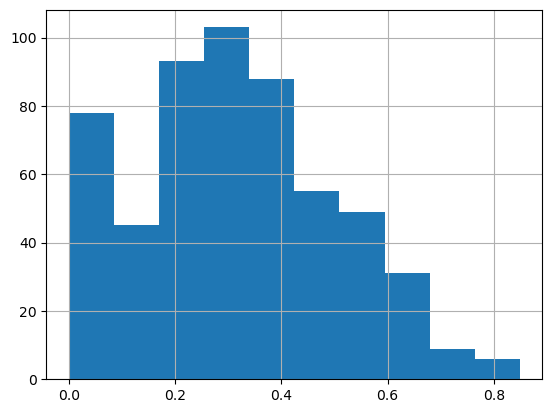

In [9]:
df_nowall.mpi.hist()

In [10]:
mpi_loss = df.mpi - df_nowall.mpi

In [11]:
(mpi_loss == 0).mean()  # 39% clusters' MPI not impacted at all

0.3877917414721723

In [12]:
(mpi_loss < 0).mean()  # no cluster sees MPI gain

0.0

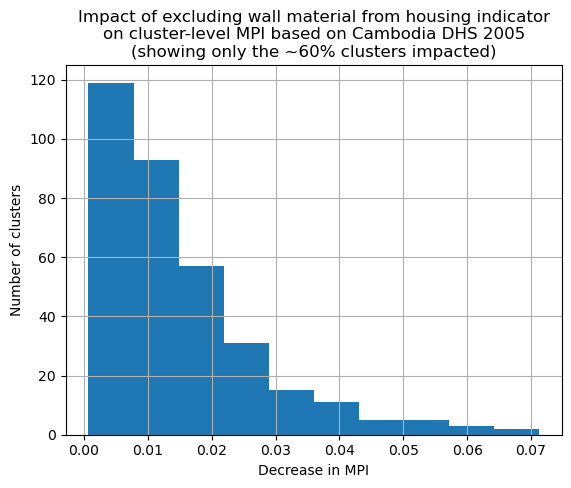

In [13]:
(mpi_loss[mpi_loss > 0]).hist()
plt.xlabel('Decrease in MPI')
plt.ylabel('Number of clusters')
plt.title('Impact of excluding wall material from housing indicator\non cluster-level MPI based on Cambodia DHS 2005\n(showing only the ~60% clusters impacted)')
plt.show()